# Analysis of Predicted SURFRAD Clearsky Irradiance
In the [first notebook](/notebooks/PVSC%20Clearsky%20AOD%20Analysis.ipynb) we calculated the clearsky irradiance for seven SURFRAD stations. Then we compared different models and atmospheric data sets at each station. In this notebook we will now combine all seven SURFRAD stations to compare models accross all regions. Finally we will calculate the grand total MBE and RMS for all SURFRAD stations for each model.

## Usage
As described in the [first notebook](/notebooks/PVSC%20Clearsky%20AOD%20Analysis.ipynb), this is a Jupyter notebook. To use it you may need to make sure that Python and the required Python packages are installed.

## Issues
While process the SURFRAD station data, there was an issue with the Sioux Falls, SD data set from 2006 which contains some data from 2007 from October 8-21. The data appears to be similar to the data from 2007, so it was removed in favor of the the later. 

In [1]:
# imports and settings
import os

import h5py
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pvlib
import seaborn as sns
import statsmodels.api as sm

from pvsc44_clearsky_aod import ecmwf_macc_tools

%matplotlib inline

sns.set_context('notebook', rc={'figure.figsize': (8, 6)})
sns.set(font_scale=1.5)

c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# get the "metadata" that contains the station id codes for the SURFRAD data that was analyzed
METADATA = pd.read_csv('metadata.csv', index_col=0)

In [3]:
# load calculations for each station
atm_params_3min_clear = {}
for station_id in METADATA.index:
    with h5py.File('%s_3min_clear_atm_params.h5' % station_id, 'r') as f:
        np_atm_params_3min_clear = pd.DataFrame(np.array(f['data']))
    np_atm_params_3min_clear['index'] = pd.DatetimeIndex(np_atm_params_3min_clear['index'])
    np_atm_params_3min_clear.set_index('index', inplace=True)
    np_atm_params_3min_clear.index.rename('timestamps', inplace=True)
    atm_params_3min_clear[station_id] = np_atm_params_3min_clear

In [4]:
# filter out low light

# CONSTANTS
LOW_LIGHT = 200  # threshold for low light in W/m^2

is_bright = {}
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    is_bright[station_id] = station_atm_params_3min_clear['ghi'] > LOW_LIGHT

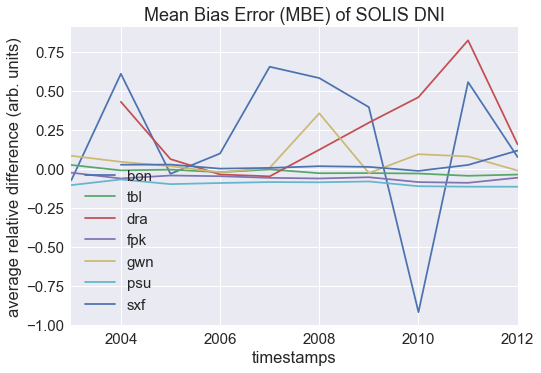

In [6]:
# plot mean bias error of annual SOLIS DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['solis_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of SOLIS DNI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_solis_dni_mbe.png')

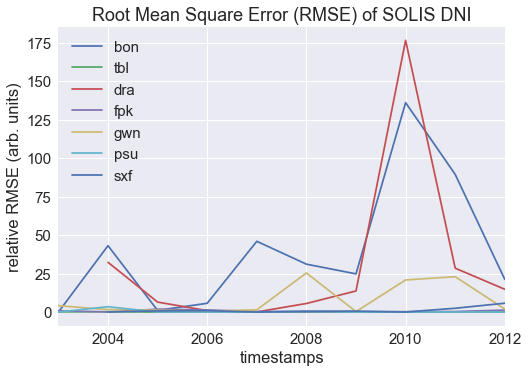

In [7]:
# plot root mean square error of annual SOLIS DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['solis_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of SOLIS DNI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_solis_dni_rms.png')

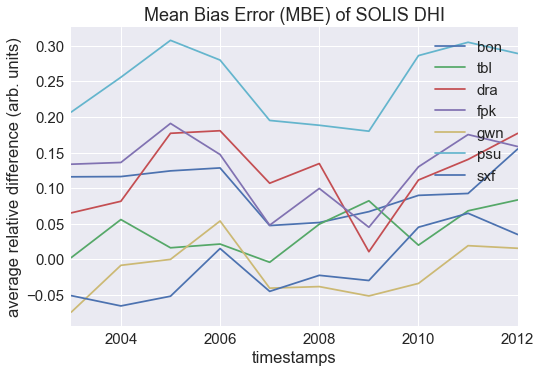

In [8]:
# plot mean bias error of annual SOLIS DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['solis_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of SOLIS DHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_solis_dhi_mbe.png')

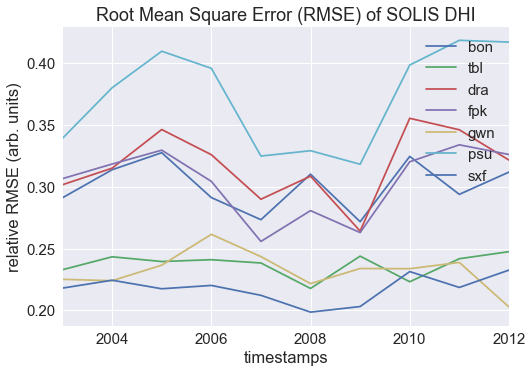

In [9]:
# plot root mean square error of annual SOLIS DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['solis_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of SOLIS DHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_solis_dhi_rms.png')

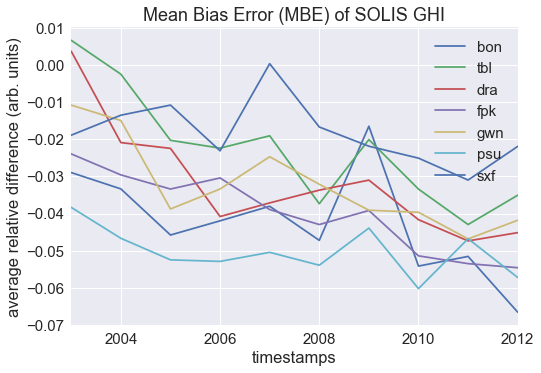

In [10]:
# plot mean bias error of annual SOLIS GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['solis_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of SOLIS GHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_solis_ghi_mbe.png')

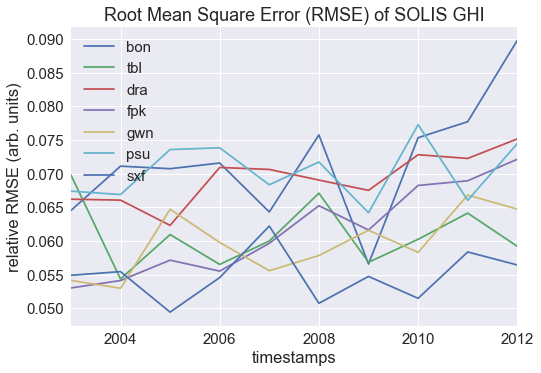

In [11]:
# plot root mean square error of annual SOLIS GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['solis_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of SOLIS GHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_solis_ghi_rms.png')

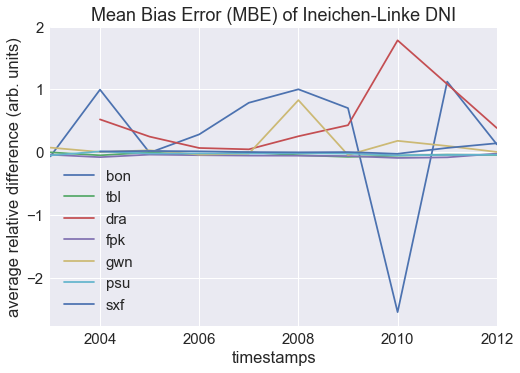

In [43]:
# plot mean bias error of annual Ineichen-Linke DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['lt_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Ineichen-Linke DNI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_lt_dni_mbe.png')

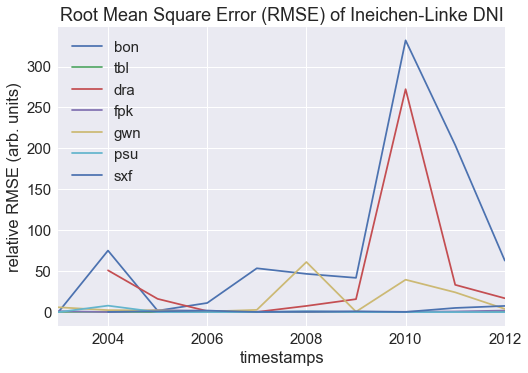

In [42]:
# plot root mean square error of annual Ineichen-Linke DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['lt_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Ineichen-Linke DNI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_lt_dni_rms.png')

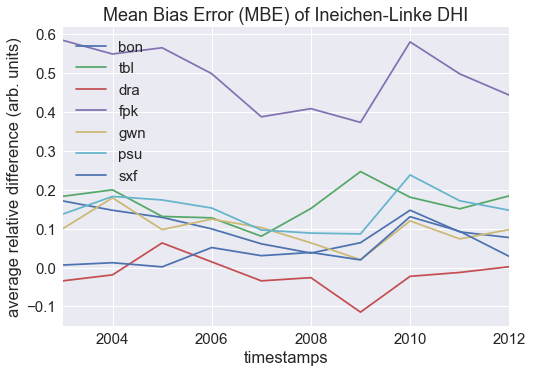

In [14]:
# plot mean bias error of annual Ineichen-Linke DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['lt_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Ineichen-Linke DHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_lt_dhi_mbe.png')

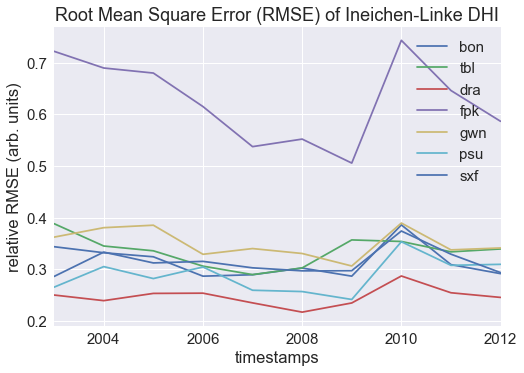

In [15]:
# plot root mean square error of annual Ineichen-Linke DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['lt_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Ineichen-Linke DHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_lt_dhi_rms.png')

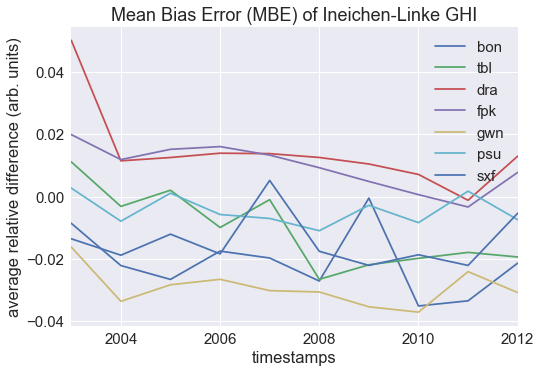

In [16]:
# plot mean bias error of annual Ineichen-Linke GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['lt_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Ineichen-Linke GHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_lt_ghi_mbe.png')

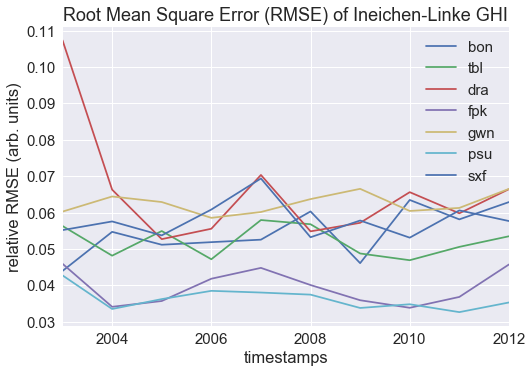

In [17]:
# plot root mean square error of annual Ineichen-Linke GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['lt_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Ineichen-Linke GHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_lt_ghi_rms.png')

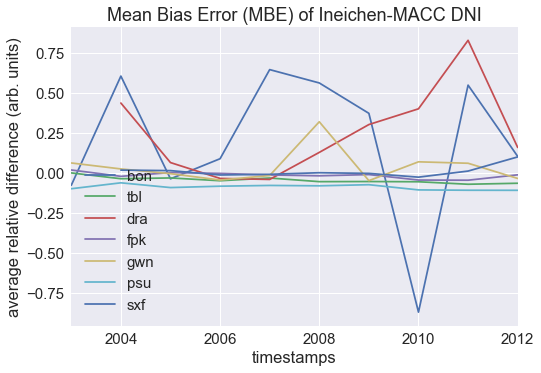

In [18]:
# plot mean bias error of annual Ineichen-MACC DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['macc_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Ineichen-MACC DNI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_macc_dni_mbe.png')

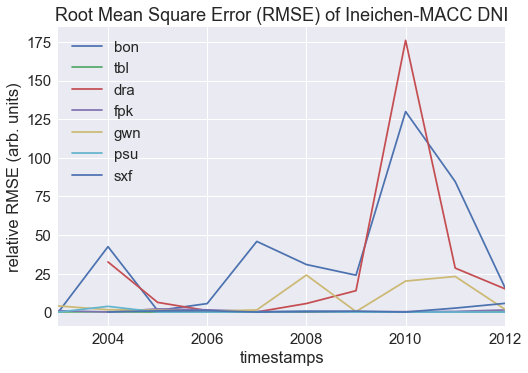

In [19]:
# plot root mean square error of annual Ineichen-MACC DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['macc_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Ineichen-MACC DNI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_macc_dni_rms.png')

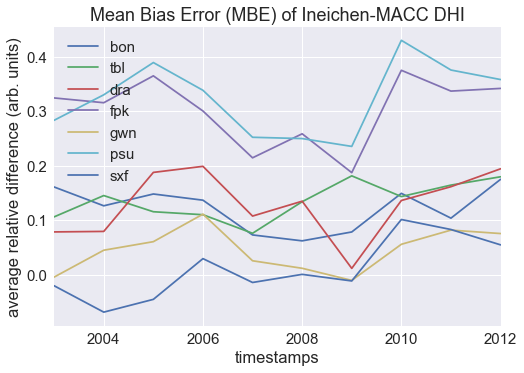

In [20]:
# plot mean bias error of annual Ineichen-MACC DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['macc_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Ineichen-MACC DHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_macc_dhi_mbe.png')

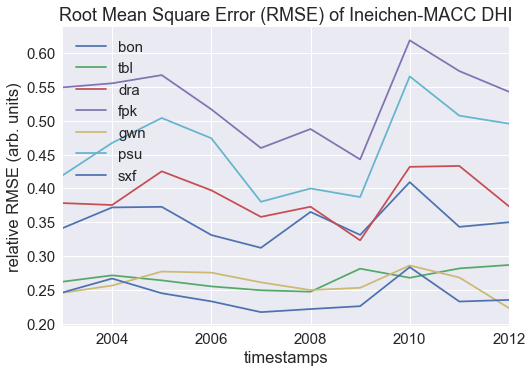

In [45]:
# plot root mean square error of annual Ineichen-MACC DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['macc_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Ineichen-MACC DHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_macc_dhi_rms.png')

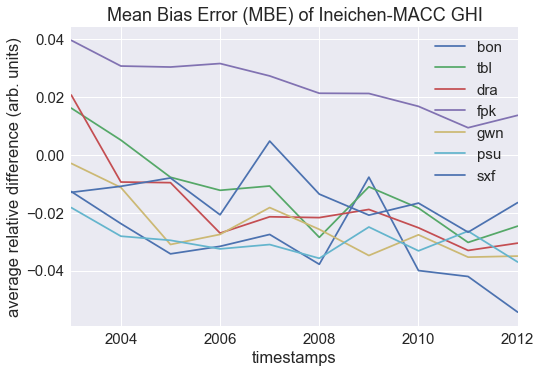

In [46]:
# plot mean bias error of annual Ineichen-MACC GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['macc_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Ineichen-MACC GHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_macc_ghi_mbe.png')

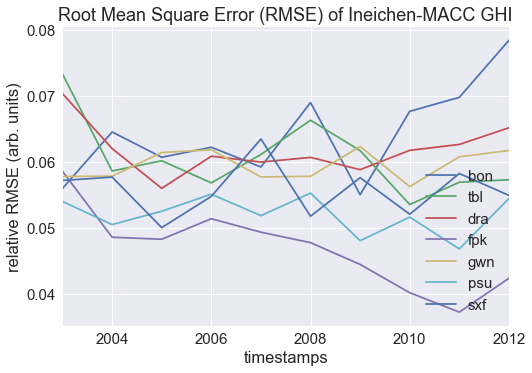

In [47]:
# plot root mean square error of annual Ineichen-MACC GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['macc_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Ineichen-MACC GHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_macc_ghi_rms.png')

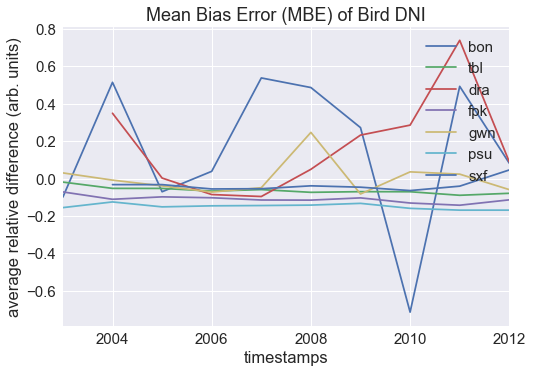

In [48]:
# plot mean bias error of annual Bird DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['bird_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Bird DNI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_bird_dni_mbe.png')

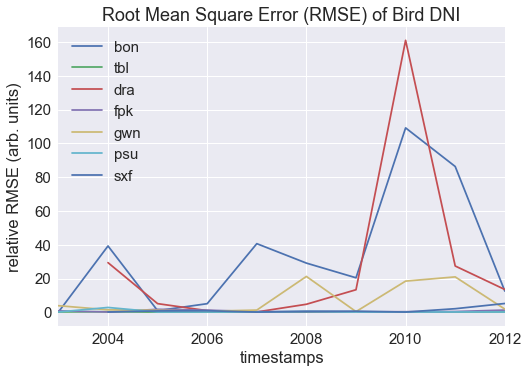

In [49]:
# plot root mean square error of annual Bird DNI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['bird_dni'] / station_atm_params_3min_clear['dni'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Bird DNI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_bird_dni_rms.png')

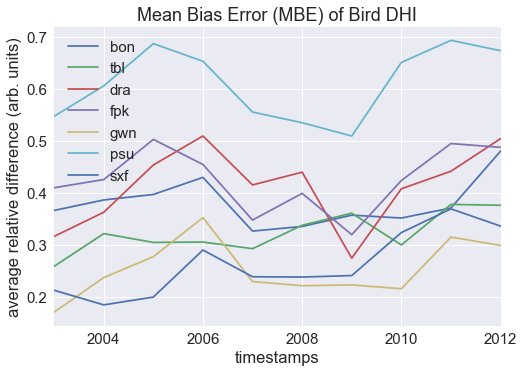

In [50]:
# plot mean bias error of annual Bird DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['bird_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Bird DHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_bird_dhi_mbe.png')

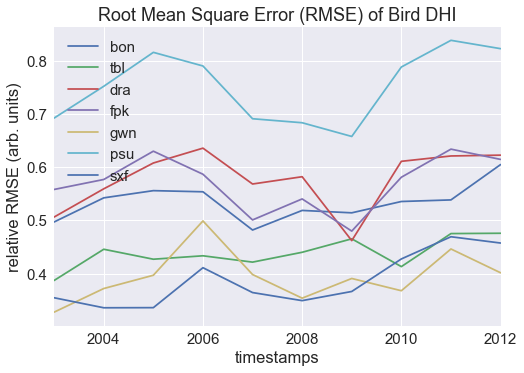

In [51]:
# plot root mean square error of annual Bird DHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['bird_dhi'] / station_atm_params_3min_clear['dhi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Bird DHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_bird_dhi_rms.png')

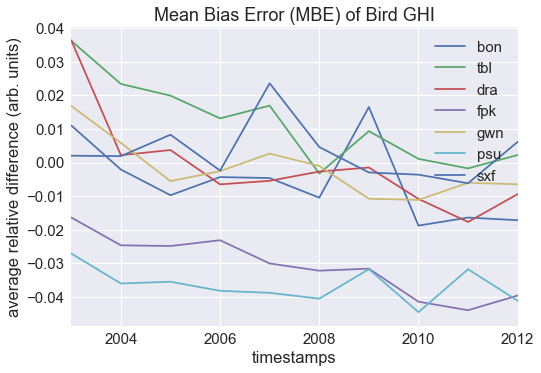

In [52]:
# plot mean bias error of annual Bird GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    (
        (station_atm_params_3min_clear['bird_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1
    ).resample('A').mean().plot()
plt.legend(METADATA.index.tolist())
plt.title('Mean Bias Error (MBE) of Bird GHI')
plt.ylabel('average relative difference (arb. units)')
plt.savefig('annual_bird_ghi_mbe.png')

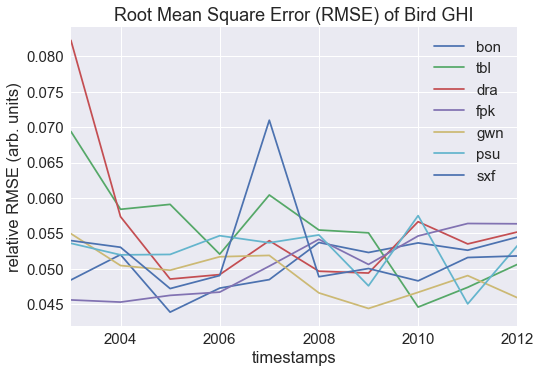

In [53]:
# plot root mean square error of annual Bird GHI
for station_id, station_atm_params_3min_clear in atm_params_3min_clear.iteritems():
    np.sqrt(
        (
            ((station_atm_params_3min_clear['bird_ghi'] / station_atm_params_3min_clear['ghi'])[is_bright[station_id]] - 1)**2
        ).resample('A').mean()
    ).plot()
plt.legend(METADATA.index.tolist())
plt.title('Root Mean Square Error (RMSE) of Bird GHI')
plt.ylabel('relative RMSE (arb. units)')
plt.savefig('annual_bird_ghi_rms.png')